# АНАЛИЗ ЭФФЕКТИВНОСТИ 2-х ВАРИАНТОВ ПОСАДОЧНОЙ СТРАНИЦЫ

## Преамбула
Команда туристической фирмы разработала 2 варианта (А и В) посадочной страницы официального сайта.

**Бизнес-задача:** провести А/В тестирование и проанализировать эффективность обоих вариантов посадочной страницы сразу по 2 критериям:
- конверсии покупки и 
- ежедневному среднему чеку.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('ab_data_tourist.csv')
data.head()

,user_id,date,group,purchase,price
0,851104,2021-01-21,A,0,0
1,804228,2021-01-12,A,0,0
2,661590,2021-01-11,B,0,0
3,853541,2021-01-08,B,0,0
4,864975,2021-01-21,A,1,150000


## 1. Анализ структуры и предобработка данных

In [ ]:
# исследуем тип данных даты
data.info()

str

In [ ]:
# Компания предлагает следующие варианты туров:
dict0 = {'Таиланд':100000,'Турция':60000,'Мальдивы':200000,'Санкт-Петербург':10000,'Камчатка':150000,0:0}
dict1 = dict(zip(dict0.values(),dict0.keys()))
dict1

{100000: 'Таиланд',
 60000: 'Турция',
 200000: 'Мальдивы',
 10000: 'Санкт-Петербург',
 150000: 'Камчатка',
 0: 0}

In [ ]:
# Добавим эти данные в нашу таблицу...
data['tour'] = data['price'].apply(lambda x: dict1[x])

In [ ]:
# приведем даты к формату to_datetime
data['date'] = pd.to_datetime(data['date'])

In [ ]:
# на всякий случай...
data['user_id'] = data['user_id'].astype('str')

In [9]:
# Убедимся в одинаковой длительности проведения A/B-тестирования в каждой из групп. 
MAX_A = data[data['group']=='A']['date'].max()
MIN_A = data[data['group']=='A']['date'].min()
MAX_B = data[data['group']=='B']['date'].max()
MIN_B = data[data['group']=='B']['date'].min()

print(f'Дата начала тестирования для группы А {MIN_A}')
print(f'Дата конца тестирования для группы А {MAX_A}')
print(f'Дата начала тестирования для группы B {MIN_B}')
print(f'Дата конца тестирования для группы B {MAX_B}')

print(f'Срок тестирования для группы А: {MAX_A-MIN_A}')
print(f'Срок тестирования для группы B: {MAX_B-MIN_B}')


Дата начала тестирования для группы А 2021-01-02 00:00:00
Дата конца тестирования для группы А 2021-01-24 00:00:00
Дата начала тестирования для группы B 2021-01-02 00:00:00
Дата конца тестирования для группы B 2021-01-24 00:00:00
Срок тестирования для группы А: 22 days 00:00:00
Срок тестирования для группы B: 22 days 00:00:00


Заключение: даты начала и конца тестирования для обеих групп совпадают. 

In [10]:
# Проверка на пропуски
data['date'].isna().sum()

0

Заключение: пропусков нет

In [11]:
# Проверим, на сколько изолированы группы (есть ли общие участники...)

set_A = set(data[data['group']=='A']['user_id'])
set_B = set(data[data['group']=='B']['user_id'])
print(f'Группы имеют {len(set_A.intersection(set_B))} общих участников.')

Группы имеют 1895 общих участников.


In [ ]:
# исключим пользователей, оказавшихся в обеих группах.

intersected = set_A.intersection(set_B)
lst = list(intersected)

indecies = data[data['user_id'].isin(lst)].index
data = data.drop(index=indecies, axis=0, inplace=False)

## 2. Первичный анализ результатов A/B-тестировани

In [14]:
# Сделайте первичный анализ результатов A/B-тестирования:
# Рассчитайте вспомогательные показатели для контрольной и тестовой групп:
#  - количество посещений сайта;
print(f'Количество посещений сайта {data.shape[0]}')

Количество посещений сайта 290688


In [15]:
#  - суммарное количество совершённых покупок;
purchasing_qty = data[data['purchase'] == 1].shape[0]
print(f'{purchasing_qty = }.')

purchasing_qty = 34777.


In [16]:
#  - сумма всех покупок.
purchasing_sum = data['price'].sum()
print(f'{purchasing_sum = :,}.')

purchasing_sum = 2,950,790,000.


In [ ]:
df_A = data[data['group']=='A']
df_B = data[data['group']=='B']
print(f'Количество наблюдений в группе А: {df_A.shape[0]}')
print(f'Количество наблюдений в группе В: {df_B.shape[0]}')

Количество наблюдений в группе А 147202
Количество наблюдений в группе В 147276


***Заключение:*** Количество посещений обоих вариантов посадочной страницы сопоставимы - Мы можем говорить о том, что выборки сбалансированны.

In [ ]:
# В каждой из групп рассчитайте:
# - конверсию
# - средний чек

pur_A = df_A[df_A['purchase'] == 1].shape[0]
users_A = df_A.shape[0]

pur_B = df_B[df_B['purchase'] == 1].shape[0]
users_B = df_B.shape[0]


conversion_A = pur_A / users_A
conversion_B = pur_B / users_B

print(f'{conversion_A = :.3f}')
print(f'{conversion_B = : .3f}')

In [20]:
# - средний чек
mean_price_A = df_A['price'].mean()
mean_price_B = df_B['price'].mean()

print(f'{mean_price_A = :,.2f}')
print(f'{mean_price_B = :,.2f}')

mean_price_A = 9,757.13
mean_price_B = 10,544.78


***Заключение:*** Конверсия практически одинкова в группах в то время, как средний чек в группе В выше на 8%.

In [ ]:
# Сравните варианты A/B по покупательской способности каждого из туров. 
# Для этого постройте сводную таблицу, которая покажет зависимость количества продаж от группы и цены тура. 


df_pivot = data[data['tour'] != 0].pivot_table(columns='group',
           index='tour',
           values='purchase',
           aggfunc='count',)

In [22]:
df_pivot

group,A,B
tour,,
Камчатка,3478,3438
Мальдивы,1724,1694
Санкт-Петербург,5182,5201
Таиланд,1832,5227
Турция,5271,1730


C:\Users\mrgli\AppData\Local\Temp\ipykernel_28560\3493062460.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


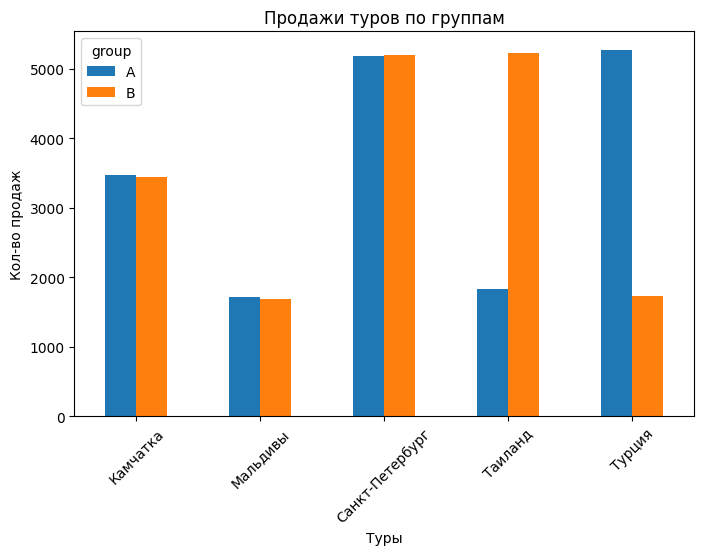

In [ ]:
# Визуализируйте полученную сводную таблицу.

fig, axes = plt.subplots(figsize=(8, 5))
df_pivot.plot(
    kind='bar',
    ax=axes
)
axes.set_title('Продажи туров по группам')
axes.set_xlabel('Туры')
axes.set_ylabel('Кол-во продаж')
# задаём поворот меток на оси абсцисс
axes.xaxis.set_tick_params(rotation=45)
fig.show()

***Заключение:*** Группа В значительно превышает группу А по турам в Таиланд.

## 3. Стабилизируем метрики ##

In [24]:
# Сгруппируйте данные по дате и группе тестирования и постройте таблицу с
# ежедневными данными результатов проведения A/B-тестирования.

data_grpd = data.groupby(['date','group']).agg({'user_id':'count','purchase':'sum','price':'sum'}).reset_index().rename(columns={'user_id':'user_count'})

In [25]:
data_grpd.head()

,date,group,user_count,purchase,price
0,2021-01-02,A,2854,359,29410000
1,2021-01-02,B,2861,345,29660000
2,2021-01-03,A,6596,748,62000000
3,2021-01-03,B,6619,754,65960000
4,2021-01-04,A,6566,799,64250000


In [26]:
data_grpd['daily_conv'] = data_grpd['purchase'] / data_grpd['user_count']
data_grpd['daily_mean'] = data_grpd['price'] / data_grpd['purchase']

In [27]:
data_grpd.head()

,date,group,user_count,purchase,price,daily_conv,daily_mean
0,2021-01-02,A,2854,359,29410000,0.125788,81922.005571
1,2021-01-02,B,2861,345,29660000,0.120587,85971.014493
2,2021-01-03,A,6596,748,62000000,0.113402,82887.700535
3,2021-01-03,B,6619,754,65960000,0.113914,87480.106101
4,2021-01-04,A,6566,799,64250000,0.121687,80413.016270


c:\Users\mrgli\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mrgli\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mrgli\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\mrgli\AppData\Local\Programs\Python\Python39\lib\site-packa

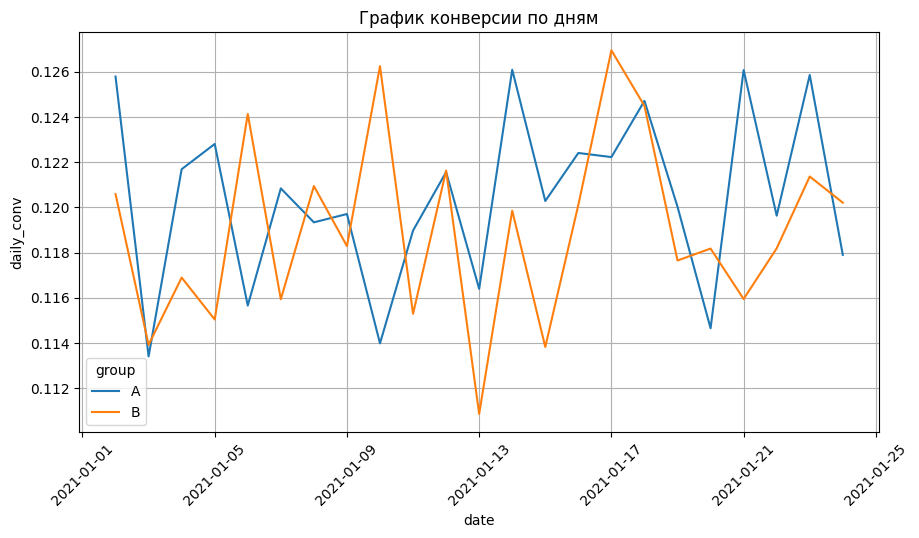

In [28]:
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для конверсии во времени в каждой группе
sns.lineplot(
    data=data_grpd,
    x='date',
    y='daily_conv',
    hue='group', 
    ax=ax
)
# задаём подпись к графику
ax.set_title('График конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation=45)
# задаём отображение сетки
ax.grid(True);

In [29]:
# Расчитаем кумулятивные метрики для Конверсии и... 
data_grpd['users_count_cum'] = data_grpd.groupby(['group'])['user_count'].cumsum()
data_grpd['purchase_cum'] = data_grpd.groupby(['group'])['purchase'].cumsum()

# и для Среднего чека...
data_grpd['price_cum'] = data_grpd.groupby(['group'])['price'].cumsum()

data_grpd['conv_cum'] = data_grpd['purchase_cum'] / data_grpd['users_count_cum'] * 100
data_grpd['mean_cum'] = data_grpd['price_cum'] / data_grpd['purchase_cum']

display(data_grpd.head())

,date,group,user_count,purchase,price,daily_conv,daily_mean,users_count_cum,purchase_cum,price_cum,conv_cum,mean_cum
0,2021-01-02,A,2854,359,29410000,0.125788,81922.005571,2854,359,29410000,12.578837,81922.005571
1,2021-01-02,B,2861,345,29660000,0.120587,85971.014493,2861,345,29660000,12.058721,85971.014493
2,2021-01-03,A,6596,748,62000000,0.113402,82887.700535,9450,1107,91410000,11.714286,82574.525745
3,2021-01-03,B,6619,754,65960000,0.113914,87480.106101,9480,1099,95620000,11.592827,87006.369427
4,2021-01-04,A,6566,799,64250000,0.121687,80413.016270,16016,1906,155660000,11.900599,81668.415530


c:\Users\mrgli\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mrgli\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mrgli\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\mrgli\AppData\Local\Programs\Python\Python39\lib\site-packa

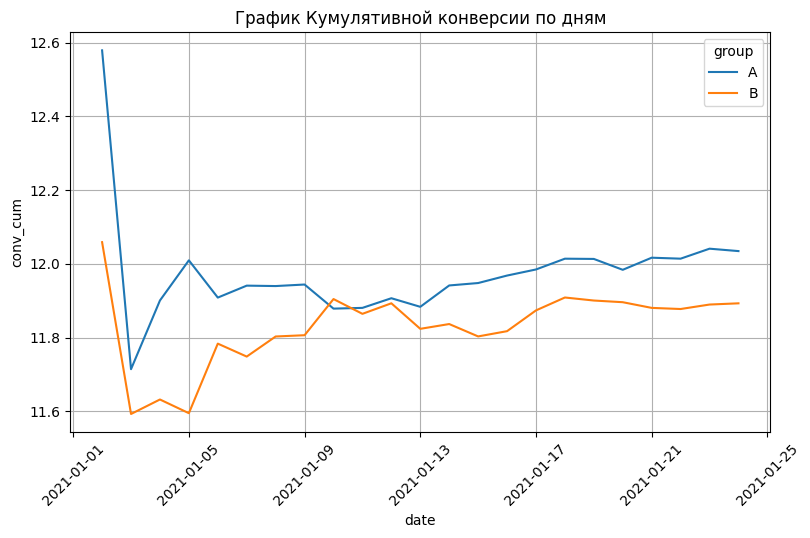

In [30]:
# Построим кумулятивные графики КОНВЕРСИИ в каждой группе по дням.

# создаем фигуру размеров 8х4
fig = plt.figure(figsize=(7,4))

# добавляем систему координат
ax = fig.add_axes([1,1,1,1])

# строим график для метрики кумулятивной конверсии для каждой группы 
sns.lineplot(data=data_grpd,
             x='date',
             y='conv_cum',
             hue='group',
             ax=ax)

# задаём подпись к графику
ax.set_title('График Кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation=45)
# задаём отображение сетки
ax.grid(True);

c:\Users\mrgli\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mrgli\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mrgli\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\mrgli\AppData\Local\Programs\Python\Python39\lib\site-packa

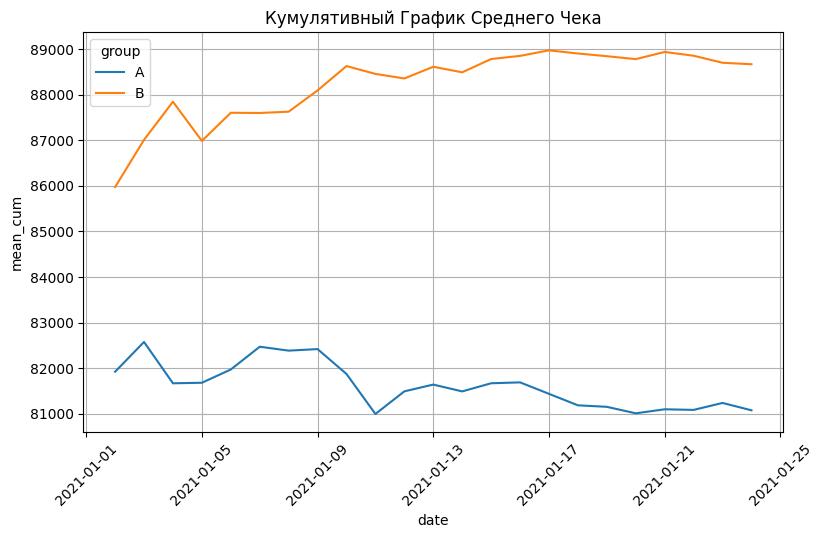

In [ ]:
# Построим кумулятивные графики Среднего Чека в каждой группе по дням.

# создаем фигуру размеров 8х4
fig = plt.figure(figsize=(7,4))

# добавляем систему координат
ax = fig.add_axes([1,1,1,1])

# строим кумулятивный график для Среднего Чека для каждой группы 
sns.lineplot(data=data_grpd,
             x='date',
             y='mean_cum',
             hue='group',
             ax=ax)

# задаём подпись к графику
ax.set_title('Кумулятивный График Среднего Чека')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation=45)
# задаём отображение сетки
ax.grid(True);

**ВЫВОДЫ:** 
- на обоих графиках мы наблюдаем, что метрики стабилизированы
- изменений по критерию Конверсии мы не наблюдаем, так как А выше почти в течение всего периода
- но по критерию Среднего чека разница весьма значительна и устойчива в пользу группы В.

А/В тест считать законченным нельзя без статистической оценки изменений...

## 4. Cтатистический анализ результатов A/B-тестирования ##

### 4.1 Протестируем разницу в Конверсии (z-тест и хи-квадрат тест)

In [32]:
# Есть ли статистическая разница между конверсиями в группах А и B?
# ПОдготовим данные для статистического теста

conv_pivot= data.groupby('group')['purchase'].agg(['sum', 'count'])
display(conv_pivot)

,sum,count
group,,
A,17487,145307
B,17290,145381


Применим Z-тест - Возьмём в качестве альтернативной двустороннюю гипотезу о неравенстве пропорций с параметром value=0. 

То есть у нас будут 2 конкурирующие гипотезы:
- Нулевая (будет означать отсутствие разницы): конверсии в группах A и B равны.
- Альтернативная (будет означать наличие разницы): конверсии в группах A и B не равны.

In [33]:
from statsmodels.stats.proportion import proportions_ztest

alpha = 0.05 # уровень значимости
# вычисляем значение p-value для Z-теста для пропорций
_, p_value = proportions_ztest(
    count=conv_pivot['sum'], # число «успехов»
    nobs=conv_pivot['count'], # общее число наблюдений
    alternative='two-sided'
    #alternative='larger'
)
# выводим результат на экран
print('p-value: ', round(p_value, 3))
# сравниваем полученное p-value с уровнем значимости
if (p_value <= alpha):
    print("Отвергаем нулевую гипотезу в пользу альтернативной")
else:
    print("У нас нет оснований отвергнуть нулевую гипотезу")


p-value:  0.239
У нас нет оснований отвергнуть нулевую гипотезу


In [34]:

from statsmodels.stats.proportion import proportions_chisquare

alpha = 0.05 # уровень значимости
# вычисляем значение p-value для Z-теста для пропорций
_, p_value, c = proportions_chisquare(
    count=conv_pivot['sum'], #число «успехов»
    nobs=conv_pivot['count'] #общее число наблюдений
)
# выводим результат на экран
print('p-value: ', round(p_value, 3))
# сравниваем полученное p-value с уровнем значимости
if (p_value <= alpha):
    print("Отвергаем нулевую гипотезу в пользу альтернативной")
else:
    print("У нас нет оснований отвергнуть нулевую гипотезу")


p-value:  0.239
У нас нет оснований отвергнуть нулевую гипотезу


ЗАКЛЮЧЕНИЕ: Мы получили идентичные результаты после 2-х тестов

### 4.2 Протестируем разницу в Среднем Чеке

In [ ]:
# разделим данные по группам...
data_grpd_A = data_grpd[data_grpd['group'] == 'A']
data_grpd_B = data_grpd[data_grpd['group'] == 'B']

c:\Users\mrgli\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mrgli\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


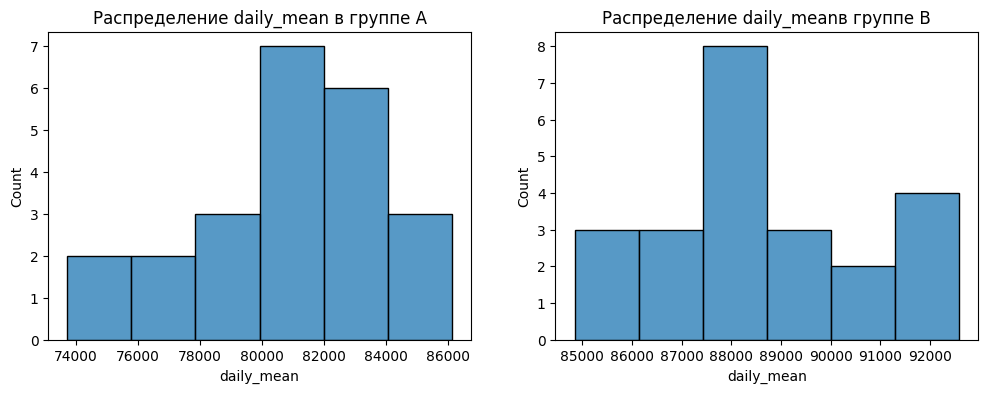

In [36]:
# создаём два графика размером 12x4
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# строим гистограмму для времени на сайте в каждой группе
sns.histplot(x='daily_mean', data=data_grpd_A, ax=axes[0])
sns.histplot(x='daily_mean', data=data_grpd_B, ax=axes[1])
# задаём названия графикам
axes[0].set_title('Распределение daily_mean в группе А');
axes[1].set_title('Распределение daily_meanв группе B');

In [59]:
# Проверим гипотезу о нормальности обоих распределений с помощью критерия Шапиро — Уилка. 
# Для этого используем функцию shapiro() из модуля scipy.stats:
from scipy.stats import shapiro

alpha = 0.05 # уровень значимости
# вычисляем результат теста Шапиро — Уилка для выборок
shapiro_result_a = shapiro(data_grpd_A['daily_mean'])
shapiro_result_b = shapiro(data_grpd_B['daily_mean'])
print('p-value группы А', round(shapiro_result_a.pvalue, 2))
print('p-value группы B', round(shapiro_result_b.pvalue, 2))

# сравниваем полученное p-value для группы А с уровнем значимости
if shapiro_result_a.pvalue <= alpha:
    print("Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе А отлично от нормального")
else:
    print("Принимаем нулевую гипотезу. Распределение в группе А является нормальным")

# сравниваем полученное p-value для группы B с уровнем значимости
if shapiro_result_b.pvalue <= alpha:
    print("Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе B отлично от нормального")
else:
    print("Принимаем нулевую гипотезу. Распределение в группе B является нормальным")


p-value группы А 0.25
p-value группы B 0.09
Принимаем нулевую гипотезу. Распределение в группе А является нормальным
Принимаем нулевую гипотезу. Распределение в группе B является нормальным


Итак, распределение в обеих группах нормальное, а значит, мы можем воспользоваться T-тестом, чтобы сравнить Средний Чек в группах.

Аналогичным образом сформулируем гипотезы:

- Нулевая (будет означать отсутствие разницы): Средний Чек в группах A и B равны.
- Альтернативная (будет означать наличие разницы): Средний Чек в группах A и B не равны.

In [38]:
from scipy.stats import ttest_ind

alpha = 0.05 #уровень значимости
# вычисляем результат T-теста для выборок
results = ttest_ind(
    a = data_grpd_A['daily_mean'],
    b = data_grpd_B['daily_mean'],
    alternative='two-sided'
)
print('p-value:', round(results.pvalue, 2))

# сравниваем полученное p-value с уровнем значимости
if results.pvalue <= alpha:
    print("Отвергаем нулевую гипотезу в пользу альтернативной")
else:
    print("У нас нет оснований отвергнуть нулевую гипотезу")


p-value: 0.0
Отвергаем нулевую гипотезу в пользу альтернативной


**ВЫВОД:** Существует статистически значимаю разница между Средним чеком в групах А и В ( что явно видно на графике выше...)

### 4.3 Доверительные интервалы ###

#### 4.3.1 Для Конверсии в каждой из групп;

In [50]:
from scipy.stats import norm

def proportion_conf_interval(x_p, n, gamma=0.95):  
    alpha = 1 - gamma # уровень значимости
    z_crit = -norm.ppf(alpha/2) # z-критическое
    eps = z_crit * (x_p * (1 - x_p) / n) ** 0.5 # погрешность
    lower_bound = x_p - eps # левая (нижняя) граница
    upper_bound = x_p + eps # правая (верхняя) граница
    # возвращаем кортеж из границ интервала
    return lower_bound, upper_bound

In [51]:
# строим доверительный интервал для конверсии в группе А
lower_bound_a, upper_bound_a  = proportion_conf_interval(
    x_p = data_grpd_A['daily_conv'].mean(), # выборочная пропорция
    n = data_grpd_A['user_count'].sum() # размер выборки
)

# строим доверительный интервал для конверсии в группе B
lower_bound_b, upper_bound_b  = proportion_conf_interval(
    x_p = data_grpd_B['daily_conv'].mean(), # выборочная пропорция
    n = data_grpd_B['user_count'].sum() # размер выборки
)

# выводим результат
print('Доверительный интервал для конверсии в группе А: {}'.format((round(lower_bound_a * 100, 2), round(upper_bound_a * 100, 2))))
print('Доверительный интервал для конверсии в группе B: {}'.format((round(lower_bound_b * 100, 2), round(upper_bound_b * 100, 2))))


Доверительный интервал для конверсии в группе А: (11.88, 12.21)
Доверительный интервал для конверсии в группе B: (11.73, 12.06)


#### 4.3.2 Для разницы конверсий в группах;

In [52]:
def diff_proportion_conf_interval(x_p, n, gamma=0.95):
    alpha = 1 - gamma # уровень значимости
    diff = x_p[1] - x_p[0] # выборочная разница конверсий групп B и A
    z_crit = -norm.ppf(alpha/2) #z-критическое
    eps = z_crit * (x_p[0] * (1 - x_p[0])/n[0] + x_p[1] * (1 - x_p[1])/n[1]) ** 0.5 # погрешность
    lower_bound = diff - eps # левая (нижняя) граница
    upper_bound = diff + eps # правая (верхняя) граница
    # возвращаем кортеж из  границ интервала
    return lower_bound, upper_bound

In [53]:
# Вызовем функцию и построим интересующий нас доверительный интервал:

# размеры выборок групп А и B
n = [data_grpd_A['user_count'].sum(), data_grpd_B['user_count'].sum()]
# выборочная пропорция групп A и B
x_p = [data_grpd_A['daily_conv'].mean(), data_grpd_B['daily_conv'].mean()]


# строим доверительный интервал для разности пропорций
lower_bound, upper_bound = diff_proportion_conf_interval(x_p=x_p, n=n)


# выводим результат
print('Доверительный интервал для разности конверсий: {}'.format((round(lower_bound*100, 2), round(upper_bound*100, 2))))

Доверительный интервал для разности конверсий: (-0.38, 0.09)


**ВЫВОД:** Левая граница доверительного интервала отрицательная, а правая — положительная. То есть истинная разница в конверсии  может быть как положительной, так и отрицательной. 

Тогда это будет значить, что варианты А и B **равнозначны** по метрике конверсии. 

#### 4.3.3 Для ежедневного среднего чека в каждой из групп.

In [58]:
# Для группы А - найдем значение t-критического 
# (для любого уровня значимости можно, используя функцию t.ppf() из модуля scipy.stats.)
# Применим формулу доверительного интервала для среднего при Неизвестном стандартном отклонении
# зададим необходимые для решения задачи переменные:

from scipy.stats import t
import statistics

n = data_grpd_A['user_count'].sum() # размер выборки
k = n - 1 # число степеней свободы
x_mean = data_grpd_A['daily_mean'].mean() # выборочное среднее
x_std = statistics.stdev(data_grpd_A['daily_mean']) # выборочное стандартное отклонение
gamma = 0.95 # уровень надёжности
alpha = 1 - gamma # уровень значимости


def t_mean_conf_interval(x_mean, x_std, n, gamma=0.95):  
    alpha = 1 - gamma # уровень значимости
    t_crit = -t.ppf(alpha/2, k) # t-критическое
    eps = t_crit * x_std/(n ** 0.5) # погрешность
    lower_bound = x_mean - eps # левая (нижняя) граница
    upper_bound = x_mean + eps # правая (верхняя) граница
    # возвращаем кортеж из границ интервала
    return lower_bound, upper_bound

# cтроим доверительный интервал для среднего при неизвестном СКО
lower_bound, upper_bound = t_mean_conf_interval(x_mean, x_std, n)

# выводим результат
print('Доверительный интервал для Среднего чека группы А: {}'.format((round(lower_bound), round(upper_bound))))


Доверительный интервал для Среднего чека группы А: (80953, 80985)


In [ ]:
# Найдем Доверительный интервал для группы В
n = data_grpd_B['user_count'].sum() # размер выборки
k = n - 1 # число степеней свободы
x_mean = data_grpd_B['daily_mean'].mean() # выборочное среднее
x_std = statistics.stdev(data_grpd_B['daily_mean']) # выборочное стандартное отклонение
gamma = 0.95 # уровень надёжности
alpha = 1 - gamma # уровень значимости


def t_mean_conf_interval(x_mean, x_std, n, gamma=0.95):  
    alpha = 1 - gamma # уровень значимости
    t_crit = -t.ppf(alpha/2, k) # t-критическое
    eps = t_crit * x_std/(n ** 0.5) # погрешность
    lower_bound = x_mean - eps # левая (нижняя) граница
    upper_bound = x_mean + eps # правая (верхняя) граница
    # возвращаем кортеж из границ интервала
    return lower_bound, upper_bound

# cтроим доверительный интервал для среднего при неизвестном СКО
lower_bound, upper_bound = t_mean_conf_interval(x_mean, x_std, n)

# выводим результат
print('Доверительный интервал для Среднего чека группы В: {}'.format((round(lower_bound), round(upper_bound))))

Доверительный интервал для Среднего чека группы В: (88564, 88587)


#### Заключение:  Мы видим, что интервалы явно НЕ пересекаются и интервал группы В находится на гараздо более высоком уровне.

## **ВЫВОД:** Таком образом вариант посадочной страницы для группы "В" показал **большую** эффективность по критерию Среднего Чека при отстутствии статистической разницы по критерию Конверсии.